# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
#open lists to store city data
city_name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

print('Beginning data retrieval')
print('-------------------------')

for index,city in enumerate(cities):
    query_url = base_url + city + "&appid=" + weather_api_key + "&units=imperial"
    
    response = requests.get(query_url).json()
    print(f"Processing Record {index} | {city}.")
    
    try:
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Process Record | {response['name']}.")
    
    except (KeyError, IndexError, TypeError):
        print("City not found. Skipping...")
        

Beginning data retrieval
-------------------------
Processing Record 0 | kapaa.
Process Record | Kapaa.
Processing Record 1 | qaanaaq.
Process Record | Qaanaaq.
Processing Record 2 | esperance.
Process Record | Esperance.
Processing Record 3 | port hawkesbury.
Process Record | Port Hawkesbury.
Processing Record 4 | korla.
Process Record | Korla.
Processing Record 5 | homer.
Process Record | Homer.
Processing Record 6 | norman wells.
Process Record | Norman Wells.
Processing Record 7 | puerto el triunfo.
Process Record | Puerto El Triunfo.
Processing Record 8 | tasiilaq.
Process Record | Tasiilaq.
Processing Record 9 | half moon bay.
Process Record | Half Moon Bay.
Processing Record 10 | buala.
Process Record | Buala.
Processing Record 11 | dikson.
Process Record | Dikson.
Processing Record 12 | maba.
Process Record | Maba.
Processing Record 13 | katsuura.
Process Record | Katsuura.
Processing Record 14 | torbay.
Process Record | Torbay.
Processing Record 15 | kedrovyy.
Process Record |

Processing Record 132 | butaritari.
Process Record | Butaritari.
Processing Record 133 | klimovo.
Process Record | Klimovo.
Processing Record 134 | doba.
Process Record | Doba.
Processing Record 135 | saint-pierre.
Process Record | Saint-Pierre.
Processing Record 136 | erzin.
Process Record | Erzin.
Processing Record 137 | khash.
Process Record | Khāsh.
Processing Record 138 | etla.
Process Record | San Sebastián Etla.
Processing Record 139 | ponta do sol.
Process Record | Ponta do Sol.
Processing Record 140 | khatanga.
Process Record | Khatanga.
Processing Record 141 | samusu.
City not found. Skipping...
Processing Record 142 | sao joao da barra.
Process Record | São João da Barra.
Processing Record 143 | burnie.
Process Record | Burnie.
Processing Record 144 | port augusta.
Process Record | Port Augusta.
Processing Record 145 | waipawa.
Process Record | Waipawa.
Processing Record 146 | velsk.
Process Record | Velsk.
Processing Record 147 | havre-saint-pierre.
Process Record | Havre-S

Processing Record 265 | victoria.
Process Record | Hong Kong.
Processing Record 266 | leningradskiy.
Process Record | Leningradskiy.
Processing Record 267 | tiarei.
Process Record | Tiarei.
Processing Record 268 | shingu.
Process Record | Shingū.
Processing Record 269 | vikulovo.
Process Record | Vikulovo.
Processing Record 270 | isangel.
Process Record | Isangel.
Processing Record 271 | avarua.
Process Record | Avarua.
Processing Record 272 | sarakhs.
Process Record | Sarakhs.
Processing Record 273 | burica.
City not found. Skipping...
Processing Record 274 | hualmay.
Process Record | Hualmay.
Processing Record 275 | guayaramerin.
Process Record | Guayaramerín.
Processing Record 276 | englehart.
Process Record | Englehart.
Processing Record 277 | matara.
Process Record | Matara.
Processing Record 278 | tumannyy.
City not found. Skipping...
Processing Record 279 | ajdabiya.
Process Record | Ajdabiya.
Processing Record 280 | longlac.
City not found. Skipping...
Processing Record 281 | a

Processing Record 401 | atambua.
Process Record | Atambua.
Processing Record 402 | havoysund.
Process Record | Havøysund.
Processing Record 403 | nouadhibou.
Process Record | Nouadhibou.
Processing Record 404 | maarianhamina.
Process Record | Mariehamn.
Processing Record 405 | pangnirtung.
Process Record | Pangnirtung.
Processing Record 406 | maiduguri.
Process Record | Maiduguri.
Processing Record 407 | taoudenni.
Process Record | Taoudenni.
Processing Record 408 | lompoc.
Process Record | Lompoc.
Processing Record 409 | ouallam.
Process Record | Ouallam.
Processing Record 410 | pozo colorado.
Process Record | Pozo Colorado.
Processing Record 411 | nova odesa.
Process Record | Nova Odesa.
Processing Record 412 | pontianak.
Process Record | Pontianak.
Processing Record 413 | ugoofaaru.
Process Record | Ugoofaaru.
Processing Record 414 | clyde river.
Process Record | Clyde River.
Processing Record 415 | copperas cove.
Process Record | Copperas Cove.
Processing Record 416 | lata.
Process

Processing Record 535 | sistranda.
Process Record | Sistranda.
Processing Record 536 | grand gaube.
Process Record | Grand Gaube.
Processing Record 537 | tautira.
Process Record | Tautira.
Processing Record 538 | barreirinhas.
Process Record | Barreirinhas.
Processing Record 539 | la ronge.
Process Record | La Ronge.
Processing Record 540 | arsk.
Process Record | Arsk.
Processing Record 541 | timmins.
Process Record | Timmins.
Processing Record 542 | araruama.
Process Record | Araruama.
Processing Record 543 | tubruq.
City not found. Skipping...
Processing Record 544 | lokoja.
Process Record | Lokoja.
Processing Record 545 | college.
Process Record | College.
Processing Record 546 | vanderhoof.
Process Record | Vanderhoof.
Processing Record 547 | baykit.
Process Record | Baykit.
Processing Record 548 | machico.
Process Record | Machico.
Processing Record 549 | san vicente.
Process Record | San Vicente.
Processing Record 550 | kodinsk.
Process Record | Kodinsk.
Processing Record 551 | s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
print(len(city_name))
print(len(lat))

567
567


In [6]:
city_df = pd.DataFrame({"City": city_name,
                       "Lat": lat,
                       "Lng": lon,
                       "Max Temp": max_temp,
                       "Humidity": humidity,
                       "Cloudiness": cloudiness,
                       "Wind Speed": wind_speed,
                        "Country": country,
                       "Date": date})

city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.08,-159.32,78.80,78,40,9.17,US,1591037288
1,Qaanaaq,77.48,-69.36,30.81,93,89,2.86,GL,1591037288
2,Esperance,-33.87,121.90,55.17,86,94,6.17,AU,1591037288
3,Port Hawkesbury,45.62,-61.35,50.00,76,90,6.93,CA,1591037288
4,Korla,41.76,86.15,76.98,18,0,1.14,CN,1591037288


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humid_city_df = city_df.loc[city_df["Humidity"]>100]
humid_city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
city_df.to_csv("../output_data/city_weather.csv", index=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

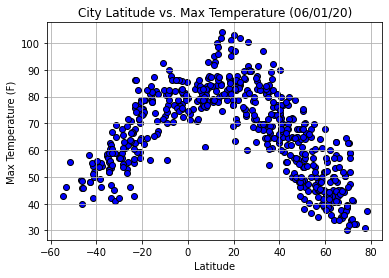

In [25]:
lat = city_df["Lat"]
max_temp = city_df["Max Temp"]
plt.scatter(lat, max_temp, facecolor = 'blue', edgecolor = 'black')
plt.grid(True)
plt.title("City Latitude vs. Max Temperature (06/01/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.show
# plt.savefig("../output_data/lat_vs_temp.png")

## Latitude vs. Humidity Plot

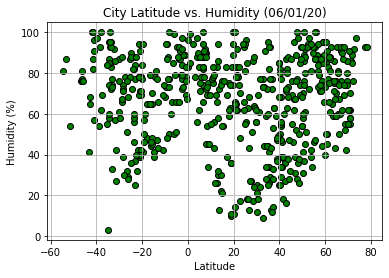

In [16]:
lat = city_df["Lat"]
max_temp = city_df["Humidity"]
plt.scatter(lat, max_temp, facecolor = 'green', edgecolor = 'black')
plt.grid(True)
plt.title("City Latitude vs. Humidity (06/01/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.show
plt.savefig("../output_data/lat_vs_humid.png")

## Latitude vs. Cloudiness Plot

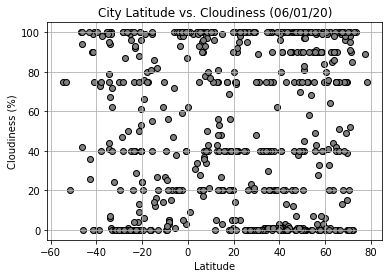

In [17]:
lat = city_df["Lat"]
max_temp = city_df["Cloudiness"]
plt.scatter(lat, max_temp, facecolor = 'gray', edgecolor = 'black')
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (06/01/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.show
plt.savefig("../output_data/lat_vs_clouds.png")

## Latitude vs. Wind Speed Plot

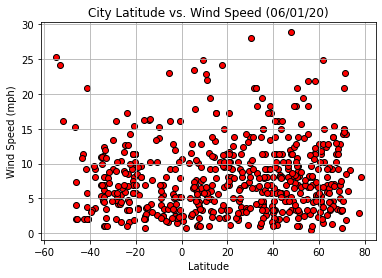

In [19]:
lat = city_df["Lat"]
max_temp = city_df["Wind Speed"]
plt.scatter(lat, max_temp, facecolor = 'red', edgecolor = 'black')
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (06/01/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.show
plt.savefig("../output_data/lat_vs_wind.png")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots


In [28]:
# Create Northern and Southern Hemisphere DataFrames
north_cities_df = city_df.loc[city_df['Lat']>0]
north_cities_df.head()

south_cities_df = city_df.loc[city_df['Lat']<0]
south_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Esperance,-33.87,121.90,55.17,86,94,6.17,AU,1591037288
10,Buala,-8.14,159.59,81.32,77,3,5.57,SB,1591037289
16,Lebu,-37.62,-73.65,54.03,69,98,3.69,CL,1591037290
18,Ushuaia,-54.80,-68.30,42.80,81,75,25.28,AR,1591037290
19,Cape Town,-33.93,18.42,59.00,93,100,1.12,ZA,1591037125


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6751583244747493


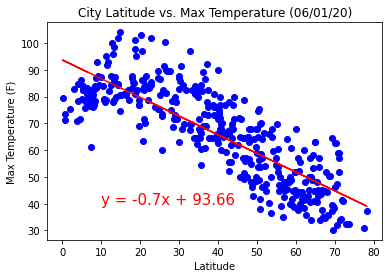

In [31]:
nlat = north_cities_df["Lat"]
nmax_temp = north_cities_df["Max Temp"]
plt.scatter(nlat, nmax_temp, facecolor = 'blue')
plt.title("City Latitude vs. Max Temperature (06/01/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, nmax_temp)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nlat,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")

plt.savefig("../output_data/north_lat_vs_temp.png")
plt.show
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6607327732909914


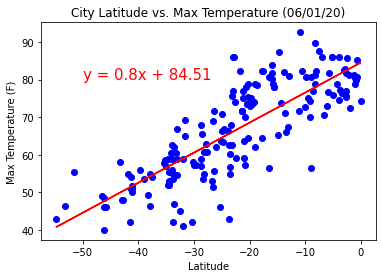

In [36]:
slat = south_cities_df["Lat"]
smax_temp = south_cities_df["Max Temp"]
plt.scatter(slat, smax_temp, facecolor = 'blue')
plt.title("City Latitude vs. Max Temperature (06/01/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, smax_temp)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(slat,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")

plt.savefig("../output_data/south_lat_vs_temp.png")
plt.show
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.013346772369896117


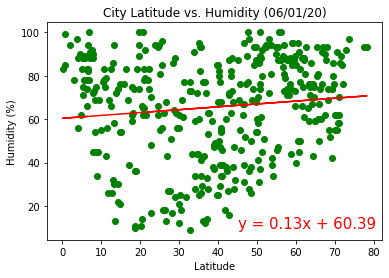

In [40]:
nlat = north_cities_df["Lat"]
nhumidity = north_cities_df["Humidity"]
plt.scatter(nlat, nhumidity, facecolor = 'green')
plt.title("City Latitude vs. Humidity (06/01/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, nhumidity)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nlat,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

plt.savefig("../output_data/north_lat_vs_humid.png")
plt.show
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0004670403777369132


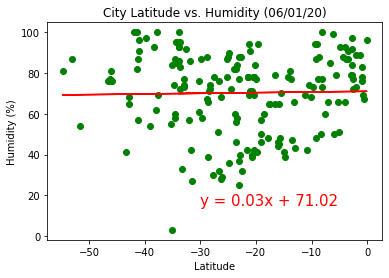

In [44]:
slat = south_cities_df["Lat"]
shumidity = south_cities_df["Humidity"]
plt.scatter(slat, shumidity, facecolor = 'green')
plt.title("City Latitude vs. Humidity (06/01/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, shumidity)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(slat,regress_values,"r-")
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")

plt.savefig("../output_data/south_lat_vs_humid.png")
plt.show
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0005050534872162659


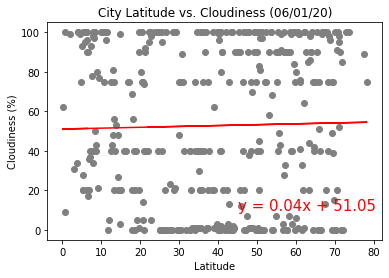

In [46]:
nlat = north_cities_df["Lat"]
nclouds = north_cities_df["Cloudiness"]
plt.scatter(nlat, nclouds, facecolor = 'gray')
plt.title("City Latitude vs. Cloudiness (06/01/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, nclouds)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nlat,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

plt.savefig("../output_data/north_lat_vs_clouds.png")
plt.show
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0035099475323216406


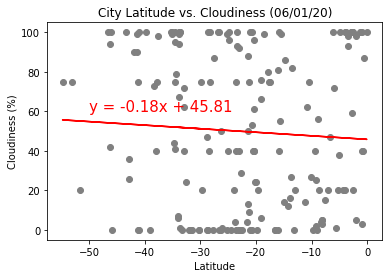

In [51]:
slat = south_cities_df["Lat"]
sclouds = south_cities_df["Cloudiness"]
plt.scatter(slat, sclouds, facecolor = 'gray')
plt.title("City Latitude vs. Cloudiness (06/01/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, sclouds)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(slat,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

plt.savefig("../output_data/south_lat_vs_clouds.png")
plt.show
print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0014403187024111994


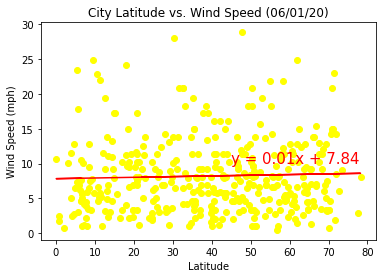

In [53]:
nlat = north_cities_df["Lat"]
nwind = north_cities_df["Wind Speed"]
plt.scatter(nlat, nwind, facecolor = 'yellow')
plt.title("City Latitude vs. Wind Speed (06/01/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, nwind)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nlat,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

plt.savefig("../output_data/north_lat_vs_wind.png")
plt.show
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.020937283398290985


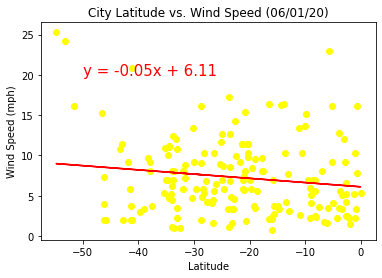

In [56]:
slat = south_cities_df["Lat"]
swind = south_cities_df["Wind Speed"]
plt.scatter(slat, swind, facecolor = 'yellow')
plt.title("City Latitude vs. Wind Speed (06/01/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, swind)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(slat,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

plt.savefig("../output_data/south_lat_vs_wind.png")
plt.show
print(f"The r-squared is: {rvalue**2}")